In [37]:
import pandas as pd

In [ ]:
dataframe = pd.DataFrame
dataframe['Age'] = [2, 2, 1, 3, 3, 3, 1, 2, 2, 3, 2, 1, 1]

In [57]:
dataframe = pd.read_excel('data.xlsx', index_col='User id')

In [58]:
for column in dataframe.columns:
    colormap = {elem: index + 1 for index, elem in enumerate(set(dataframe[column]))}
    dataframe[column] = dataframe[column].map(colormap)
dataframe['Age'] = [2, 2, 1, 3, 3, 3, 1, 2, 2, 3, 2, 1, 1]
dataframe

,Age,Incoming,Student,Credit Rating,Buying
User id,,,,,
1,2,1,1,2,1
2,2,1,1,1,1
3,1,1,1,2,2
4,3,2,1,2,2
5,3,3,2,2,2
6,3,3,2,1,1
7,1,3,2,1,2
8,2,2,1,2,1
9,2,3,2,2,2


In [59]:
from sklearn import tree

A = ['Age', 'Incoming', 'Student', 'Credit Rating']
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(dataframe[A], dataframe['Buying'])

DecisionTreeClassifier(criterion='entropy')

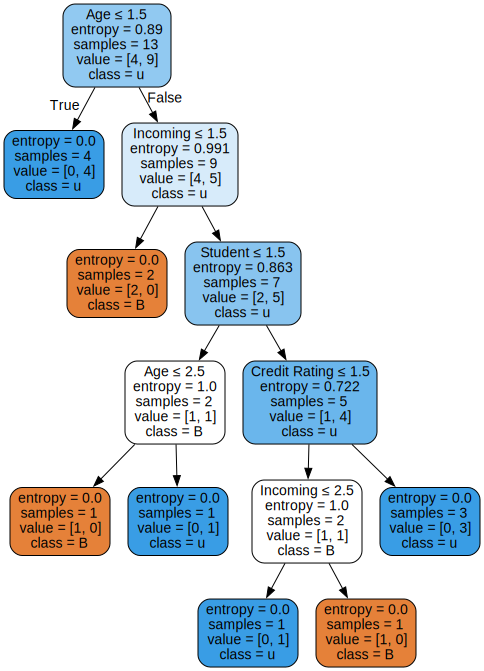

In [63]:
import graphviz


def plot_tree(clf, feature_names, target_names):
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=feature_names,
                                    class_names=target_names,
                                    filled=True, rounded=True,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render('graph')
    return graph


plot_tree(clf, A, 'Buying')

In [43]:
import numpy as np


# 定义计算信息熵的函数：计算Infor(D)
def infor(data):
    a = pd.value_counts(data) / len(data)
    return sum(np.log2(a) * a * (-1))


# 定义计算信息增益的函数：计算g(D|A)
def g(data, str1, str2):
    e1 = data.groupby(str1).apply(lambda x: infor(x[str2]))
    p1 = pd.value_counts(data[str1]) / len(data[str1])
    # 计算Infor(D|A)
    e2 = sum(e1 * p1)
    gain = infor(data[str2]) - e2
    print(f"{str1}信息增益：{gain}")
    return gain


for col in dataframe.columns:
    g(dataframe, col, 'Buying')

Age信息增益：0.2674250655956548
Incoming信息增益：0.05551064235231107
Student信息增益：0.11036014405977657
Credit Rating信息增益：0.01780102730053701
Buying信息增益：0.8904916402194913


In [44]:
dataframe.drop(dataframe[dataframe['Age'] == 2].index, inplace=True)
dataframe

,Age,Incoming,Student,Credit Rating,Buying
User id,,,,,
1,1,1,1,2,1
2,1,1,1,1,1
4,3,2,1,2,2
5,3,3,2,2,2
6,3,3,2,1,1
8,1,2,1,2,1
9,1,3,2,2,2
10,3,2,2,2,2
11,1,2,2,1,2


In [45]:
for col in dataframe.columns:
    g(dataframe, col, 'Buying')

Age信息增益：0.09109100760379174
Incoming信息增益：0.3244093931715556
Student信息增益：0.22943684069673975
Credit Rating信息增益：0.07278022578373267
Buying信息增益：0.9910760598382222


In [46]:
dataframe.drop(dataframe[dataframe['Incoming'] == 1].index, inplace=True)
dataframe

,Age,Incoming,Student,Credit Rating,Buying
User id,,,,,
4,3,2,1,2,2
5,3,3,2,2,2
6,3,3,2,1,1
8,1,2,1,2,1
9,1,3,2,2,2
10,3,2,2,2,2
11,1,2,2,1,2


In [47]:
for col in dataframe.columns:
    g(dataframe, col, 'Buying')

Age信息增益：0.0059777114237739015
Incoming信息增益：0.0059777114237739015
Student信息增益：0.061743357932800724
Credit Rating信息增益：0.061743357932800724
Buying信息增益：0.863120568566631


In [48]:
Student = dataframe[dataframe['Student'] == 2]
Student

,Age,Incoming,Student,Credit Rating,Buying
User id,,,,,
5,3,3,2,2,2
6,3,3,2,1,1
9,1,3,2,2,2
10,3,2,2,2,2
11,1,2,2,1,2


In [50]:
for col in dataframe.columns:
    g(Student, col, 'Buying')

Age信息增益：0.17095059445466865
Incoming信息增益：0.17095059445466865
Student信息增益：0.0
Credit Rating信息增益：0.3219280948873623
Buying信息增益：0.7219280948873623


In [51]:
Student = Student[Student['Credit Rating'] == 1]
Student

,Age,Incoming,Student,Credit Rating,Buying
User id,,,,,
6,3,3,2,1,1
11,1,2,2,1,2


In [52]:
for col in dataframe.columns:
    g(Student, col, 'Buying')

Age信息增益：1.0
Incoming信息增益：1.0
Student信息增益：0.0
Credit Rating信息增益：0.0
Buying信息增益：1.0


In [53]:
NoStudent = dataframe[dataframe['Student'] == 1]
NoStudent

,Age,Incoming,Student,Credit Rating,Buying
User id,,,,,
4,3,2,1,2,2
8,1,2,1,2,1


In [54]:
for col in dataframe.columns:
    g(NoStudent, col, 'Buying')

Age信息增益：1.0
Incoming信息增益：0.0
Student信息增益：0.0
Credit Rating信息增益：0.0
Buying信息增益：1.0
